In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<h2>Navigate to Target dataset</h2>

In [2]:
import os
print(os.getcwd())
os.chdir('drive/My Drive/covid_sets')
print(os.getcwd())

/content
/content/drive/My Drive/covid_sets


<h2>Load Target Test data</h2>

In [0]:
import pandas as pd
import numpy as np

#intialize datasets dict
datasets = {'X_test':None,'y_test':None}

#load Test data
for file in os.listdir():
  filename = file[:-4]
  if filename in datasets:
    datasets[filename] = np.load(os.path.join(os.getcwd(),file))


<h2>Load finalized models</h2>

In [0]:
model_names = {"densenet121_imageNet_target_batch32","densenet169_imageNet_target_batch32", 
                  "resnet50v2_imageNet_target_batch32","resnet101v2_imageNet_target_batch32",
                  "resnet101v2_hard_labels_target_batch32_randomfc","densenet169_hard_labels_target_batch32_randomfc","resnet50v2_hard_labels_target_batch32_randomfc",
                  "densenet121_hard_labels_target_batch32_randomfc","densenet121_soft_labels_target",
                  "densenet169_soft_labels_target","resnet50v2_soft_labels_target""resnet101v2_soft_labels_target"}


In [21]:
from keras.models import save_model,load_model
import os

print(os.getcwd())
#os.chdir('../mid_slices/tuned_models')

#models dict
models = {}
for file in os.listdir():
  filename = file[:-5]

  #if target in file load model and add to models dict
  #print(file)
  if filename in model_names:
    print(filename)
    model = load_model(os.path.join(os.getcwd(),file))
    models[filename] = model
    

/content/drive/My Drive/mid_slices/tuned_models
densenet121_imageNet_target_batch32
densenet169_imageNet_target_batch32
resnet50v2_imageNet_target_batch32
resnet101v2_imageNet_target_batch32
resnet101v2_hard_labels_target_batch32_randomfc
densenet169_hard_labels_target_batch32_randomfc
resnet50v2_hard_labels_target_batch32_randomfc
densenet121_hard_labels_target_batch32_randomfc
densenet121_soft_labels_target
densenet169_soft_labels_target


<h2>Create legend formatting dict for architecture and label plots</h2>

In [0]:
arch_keys = {"densenet121_imageNet_target_batch32":("DenseNet121: ImageNet",221),"densenet169_imageNet_target_batch32":("DenseNet169: ImageNet",222), 
                  "resnet50v2_imageNet_target_batch32": ("ResNet50V2: ImageNet",223),"resnet101v2_imageNet_target_batch32":("ResNet101V2: ImageNet",224),
                  "resnet101v2_hard_labels_target_batch32_randomfc": ("ResNet101V2 : Hard Labels",224),"densenet169_hard_labels_target_batch32_randomfc":
                  ("DenseNet169: Hard Labels",222),"resnet50v2_hard_labels_target_batch32_randomfc": ("ResNet50V2: Hard Labels",223),
                  "densenet121_hard_labels_target_batch32_randomfc":("DenseNet121: Hard Labels",221),"densenet121_soft_labels_target":("DenseNet121: Soft Labels",221),
                  "densenet169_soft_labels_target":("DenseNet169: Soft Labels",222),"resnet50v2_soft_labels_target": ("ResNet50V2: Soft Labels",223),"resnet101v2_soft_labels_target":
                  ("ResNet101V2: Soft Labels",224)}

label_keys = {"resnet101v2_hard_labels_target_batch32_randomfc": ("ResNet101V2: Hard Labels",121),"densenet169_hard_labels_target_batch32_randomfc":
                ("DenseNet169: Hard Labels",121),"resnet50v2_hard_labels_target_batch32_randomfc": ("ResNet50V2: Hard Labels",121),
                "densenet121_hard_labels_target_batch32_randomfc":("DenseNet121: Hard Labels",121),"densenet121_soft_labels_target":("DenseNet121: Soft Labels",122),
                "densenet169_soft_labels_target":("DenseNet169: Soft Labels",122),"resnet50v2_soft_labels_target": ("ResNet50V2: Soft Labels",122),"resnet101v2_soft_labels_target":
                ("ResNet101V2: Soft Labels",122),"densenet169_soft_labels_target_15epochtrans":("DenseNet169: Soft Labels (15 epochs)",122),"densenet121_soft_labels_target_alt":
                ("DenseNet121: Soft Labels (alt)",122)}                 

def get_name(label):
  result = ""
  for char in label:
    if char == ":":
      return(result)  
    result += char              

<h2>Plot AUC ROC</h2>

densenet121_imageNet_target_batch32
densenet169_imageNet_target_batch32
resnet50v2_imageNet_target_batch32
resnet101v2_imageNet_target_batch32
resnet101v2_hard_labels_target_batch32_randomfc
densenet169_hard_labels_target_batch32_randomfc


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


resnet50v2_hard_labels_target_batch32_randomfc


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


densenet121_hard_labels_target_batch32_randomfc


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


densenet121_soft_labels_target
densenet169_soft_labels_target


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


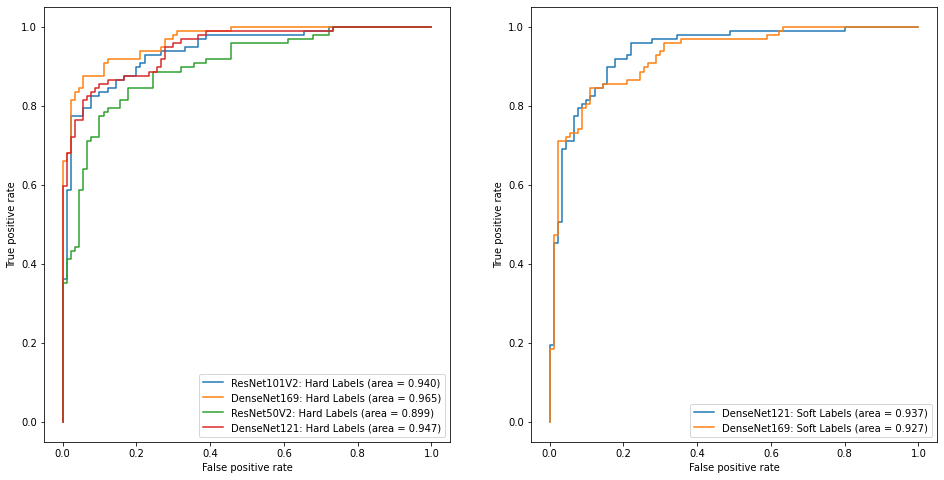

In [23]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt



###UNCOMMENT TO PLOT BY ARCHITECTURE###
# fig = plt.figure(figsize=(16,16))
fig = plt.figure(figsize=(16,8))

for key,value in models.items():

  print(key)
  if "imageNet" not in key:
    # model_info = arch_keys[key]
    model_info = label_keys[key]

    #define subplot
    fig.add_subplot(model_info[1])

    #generate predicted labels
    target_y_pred = models[key].predict(datasets['X_test'])


    #calculate false positive rate and true positive rate
    target_fpr, target_tpr, target_thresholds = roc_curve(datasets['y_test'], target_y_pred)

    #calculate auc
    target_auc= auc(target_fpr, target_tpr)

    #plot auc and label axes
    plt.plot(target_fpr, target_tpr, label='{model} (area = {area:.3f})'.format(area=target_auc,model=model_info[0]))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    #plt.title('ROC: {model}'.format(model=get_name(model_info[0])))

    #plot legend
    plt.legend(loc='best', prop={"size":10})



#plt.show()
#plt.savefig(os.path.join("/content/drive/My Drive/figures", "ROCbyARCH.png"))
plt.savefig(os.path.join("/content/drive/My Drive/figures", "ROCbyLABEL.png"))


<h2>Calculate F1, Accuracy, Loss, Precision and Recall Score</h2>

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score


##PLOT BY ARCHITECTURE
fig = plt.figure(figsize=(16,16))


for key,value in models.items():

  #model name
  model_info = arch_keys[key]
  print(model_info[0])

  #threshold predictions at 0.5
  target_y_pred = models[key].predict(datasets['X_test'])
  targ_y_pred_binary = []
  for pred in target_y_pred:
    if pred >= 0.5:
      targ_y_pred_binary.append(1)
    else:
      targ_y_pred_binary.append(0)

  #get loss and accuracy
  scores = models[key].evaluate(datasets['X_test'],datasets['y_test'])
  print(f'Loss: {scores[0]}', f'Accuracy: {scores[1]}')

  #get f1
  targetf1 = f1_score(datasets['y_test'],targ_y_pred_binary)
  print(f'F1 score: {targetf1}')
 
  #get precision and recall
  target_pres, target_rec = precision_score(datasets['y_test'],targ_y_pred_binary), recall_score(datasets['y_test'],targ_y_pred_binary)
  print(f'Precision score: {target_pres}',f'Recall score: {target_rec}')
 



DenseNet121: ImageNet
187/187 [==============================] - 3s 18ms/step
Loss: 0.4959611228921197 Accuracy: 0.8609625697135925
F1 score: 0.8645833333333334
Precision score: 0.8736842105263158 Recall score: 0.8556701030927835
DenseNet169: ImageNet
187/187 [==============================] - 5s 26ms/step
Loss: 0.517351203583141 Accuracy: 0.8770053386688232
F1 score: 0.8783068783068784
Precision score: 0.9021739130434783 Recall score: 0.8556701030927835
ResNet50V2: ImageNet
187/187 [==============================] - 1s 8ms/step
Loss: 0.9478306056343936 Accuracy: 0.866310179233551
F1 score: 0.8648648648648649
Precision score: 0.9090909090909091 Recall score: 0.8247422680412371
ResNet101V2: ImageNet
187/187 [==============================] - 3s 16ms/step
Loss: 1.0314176343979045 Accuracy: 0.8288770318031311
F1 score: 0.8297872340425533
Precision score: 0.8571428571428571 Recall score: 0.8041237113402062
ResNet101V2 : Hard Labels
187/187 [==============================] - 3s 16ms/step
Lo

<Figure size 1152x1152 with 0 Axes>

<h2>Plot Confusion Matrix</h2>

DenseNet121: ImageNet
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_6 (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 1001      
Total params: 8,063,505
Trainable params: 5,611,153
Non-trainable params: 2,452,352
_________________________________________________________________
None
false positive: 12 false negative: 14 true positive: 83 true negative: 78 a

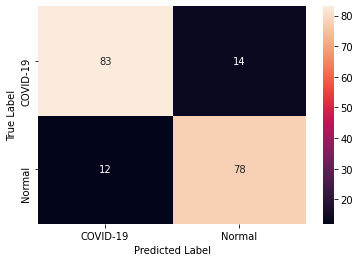

DenseNet169: ImageNet
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1664)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              1665000   
_________________________________________________________________
dense_6 (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 1001      
Total params: 14,308,881
Trainable params: 10,135,185
Non-trainable params: 4,173,696
_________________________________________________________________
None
false positive: 9 false negative: 14 true positive: 83 true negative: 81 

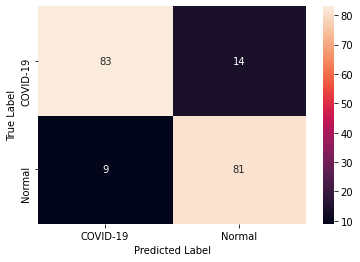

ResNet50V2: ImageNet
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
average_pooling2d_1 (Average (None, 3, 3, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              18433000  
_________________________________________________________________
dense_10 (Dropout)           (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 1001      
Total params: 41,998,801
Trainable params: 39,794,001
Non-trainable params: 2,204,800
_____________

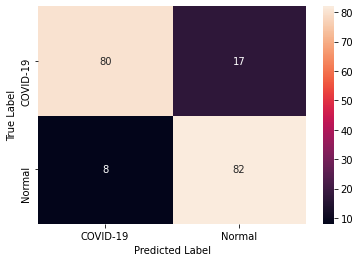

ResNet101V2: ImageNet
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Model)          (None, 7, 7, 2048)        42626560  
_________________________________________________________________
average_pooling2d_2 (Average (None, 3, 3, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              18433000  
_________________________________________________________________
dense_10 (Dropout)           (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 1001      
Total params: 61,060,561
Trainable params: 49,093,969
Non-trainable params: 11,966,592
___________

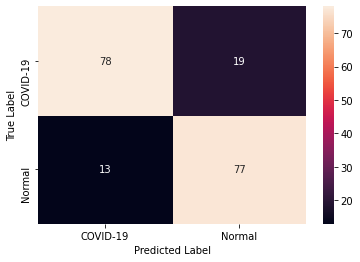

ResNet101V2 : Hard Labels
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Model)          (None, 7, 7, 2048)        42626560  
_________________________________________________________________
average_pooling2d_6 (Average (None, 3, 3, 2048)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              18433000  
_________________________________________________________________
dropout_8 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 1001      
Total params: 61,060,561
Trainable params: 49,093,969
Non-trainable params: 11,966,592
______

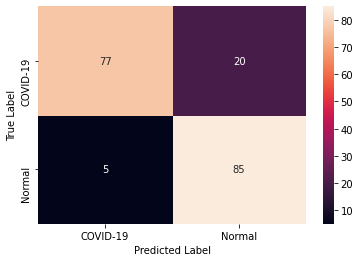

DenseNet169: Hard Labels
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1664)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              1665000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 1001      
Total params: 14,308,881
Trainable params: 10,135,185
Non-trainable params: 4,173,696
_________________________________________________________________
None
false positive: 5 false negative: 13 true positive: 84 true negative:

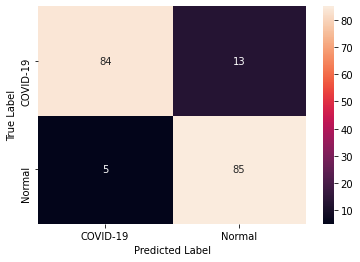

ResNet50V2: Hard Labels
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
average_pooling2d_5 (Average (None, 3, 3, 2048)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              18433000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 41,998,801
Trainable params: 39,794,001
Non-trainable params: 2,204,800
__________

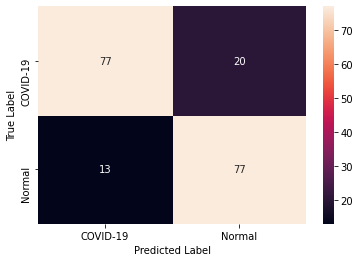

DenseNet121: Hard Labels
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 8,063,505
Trainable params: 5,611,153
Non-trainable params: 2,452,352
_________________________________________________________________
None
false positive: 12 false negative: 13 true positive: 84 true negative: 7

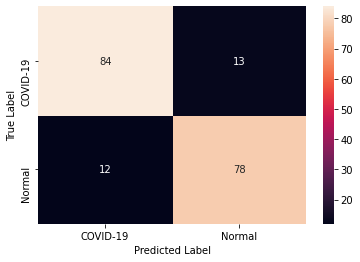

DenseNet121: Soft Labels
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 8,063,505
Trainable params: 5,611,153
Non-trainable params: 2,452,352
_________________________________________________________________
None
false positive: 14 false negative: 14 true positive: 83 true negative: 7

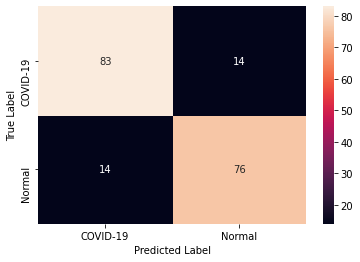

DenseNet169: Soft Labels
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1664)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1665000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1001      
Total params: 14,308,881
Trainable params: 10,135,185
Non-trainable params: 4,173,696
_________________________________________________________________
None
false positive: 8 false negative: 22 true positive: 75 true negative: 

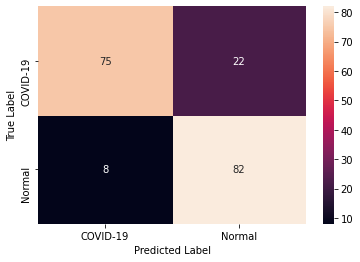

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

#Evaluate Performance
def evaluate(y_actual,y_pred):
    
    #compare actual and predicted y's
    evaluation = y_actual - y_pred
    
    #initialize confusion matrix metrics
    false_positive = false_negative = true_positive = true_negative = 0
    
    #calculate confusion matrix metrics
    for e_p,y_p in zip(evaluation,y_actual):
        if e_p == -1:
            false_positive += 1
        elif e_p == 1:
            false_negative += 1
        elif y_p == 0:
            true_negative += 1
        else:
            true_positive += 1

    #calculate accuracy
    accuracy = (true_positive+true_negative)/(len(evaluation))
  
    return false_positive, false_negative, true_positive, true_negative, accuracy


for key,value in models.items():

  #model name
  model_info = arch_keys[key]
  print(model_info[0])
  print(models[key].summary())
  
  #threshold predictions at 0.5
  target_y_pred = models[key].predict(datasets['X_test'])
  targ_y_pred_binary = []
  for pred in target_y_pred:
    if pred >= 0.5:
      targ_y_pred_binary.append(1)
    else:
      targ_y_pred_binary.append(0)

  
  #generate confusion matrix
  false_positive, false_negative, true_positive, true_negative, accuracy = evaluate(datasets['y_test'],targ_y_pred_binary)
  print(f'false positive: {false_positive}',f'false negative: {false_negative}',f'true positive: {true_positive}',f'true negative: {true_negative}',f'accuracy: {accuracy}')
  cf_matrix = confusion_matrix(datasets['y_test'],targ_y_pred_binary)
  

  #visualize heatmap of confusion matrix and set axes
  hmap = sns.heatmap(cf_matrix, annot=True)
  hmap.set_ylabel('True Label')
  hmap.set_xlabel('Predicted Label')
  hmap.xaxis.set_ticklabels(['Normal','COVID-19']); hmap.yaxis.set_ticklabels(['Normal','COVID-19']);
  hmap.invert_yaxis()
  hmap.invert_xaxis()



  # plt.show()
  filename = f"Confusion Matrix {model_info[0]}.png"
  plt.savefig(os.path.join("/content/drive/My Drive/figures", filename))
  plt.show()

  